In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from animate import ScheduleAnimation
from astropy.table import QTable
from astropy.time import Time

%matplotlib widget

In [3]:
schedule = QTable.read("OR4_AOS_schedule.ecsv")

interactive(children=(IntSlider(value=70, description='iframe', max=323), Output()), _dom_classes=('widget-int…

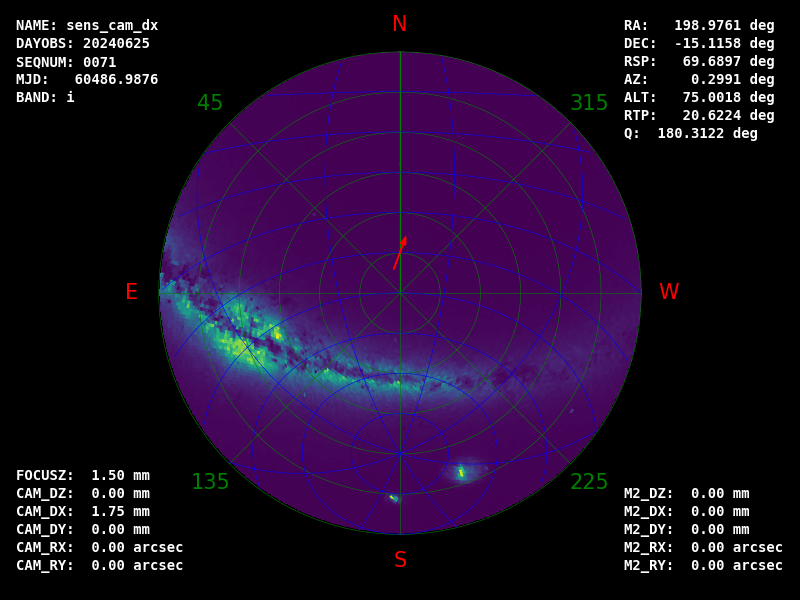

In [4]:
fig = plt.figure(facecolor="k", figsize=(8, 6))
axis = fig.add_subplot(111)
anim = ScheduleAnimation(schedule, axis=axis)


@widgets.interact(iframe=widgets.IntSlider(value=70, min=0, max=len(schedule) - 1))
def f(iframe):
    anim.set_iframe(iframe)

In [5]:
import matplotlib.animation as animation
from tqdm.notebook import tqdm

metadata = dict(title='AOS Schedule')
writer = animation.FFMpegWriter(fps=15, bitrate=5000, metadata=metadata)
with writer.saving(anim.fig, "AOS Schedule.mp4", 100):
    for i in tqdm(range(anim.nframe)):
        anim.set_iframe(i)
        writer.grab_frame(facecolor=anim.fig.get_facecolor())

  0%|          | 0/324 [00:00<?, ?it/s]